<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%08Kmean%2B%2B(StockPattern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- K-Means clustering을 이용하여 주가의 과거 20일 패턴을 8개의 클러스터로 분류한다.
- 일별 주가의 종가 (closed price)를 표준화하여 (Z-score normalization) 20일씩 잘랐다. 
- 열은 20일 주가이고, 행은 20일 주가 패턴 1개를 의미한다.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np

In [ ]:
df = pd.read_csv('stockPattern.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.265213,-0.942541,-1.112369,-0.008491,-0.517973,0.161336,-0.942541,-0.433060,1.519954,1.180300,-0.093405,1.010472,0.500990,-0.772714,-2.131332,-1.452023,0.755731,0.840645,-0.008491,1.180300
1,-0.921855,-1.080796,-0.047682,-0.524504,0.111258,-0.921855,-0.445034,1.382783,1.064902,-0.127152,0.905961,0.429139,-0.762915,-2.034439,-1.398677,0.667550,0.747021,-0.047682,1.064902,1.939075
2,-1.153825,-0.179817,-0.629359,-0.029969,-1.003978,-0.554435,1.168810,0.869115,-0.254741,0.719268,0.269725,-0.854130,-2.052910,-1.453520,0.494496,0.569420,-0.179817,0.869115,1.693276,1.693276
3,-0.309410,-0.751423,-0.162072,-1.119768,-0.677754,1.016631,0.721956,-0.383079,0.574618,0.132604,-0.972430,-2.151133,-1.561782,0.353611,0.427280,-0.309410,0.721956,1.532314,1.532314,1.384976
4,-0.799869,-0.220778,-1.161801,-0.727483,0.937403,0.647858,-0.437938,0.503085,0.068767,-1.017028,-2.175210,-1.596119,0.285926,0.358313,-0.365551,0.647858,1.444108,1.444108,1.299335,0.865017


In [ ]:
stockpattern = df.copy()
# print(stockpattern)
stockpattern.shape

(26117, 20)

In [ ]:
X = np.array(df)
K = 8

In [ ]:
# K-means 알고리즘으로 시험용 데이터를 3 그룹으로 분류한다 (k = 3)
# n_init = 10 (default) : Local min에 빠지는 것을 완화함.
# 초기 중심을 다르게 설정하여 (10 번) error가 작은 값을 최종 학습 결과로 선택한다.
# 학습 데이터를 K 그룹으로 분류한다.
km = KMeans(n_clusters=8, init='k-means++', n_init=100, max_iter=300, tol=1e-04, random_state=0)
km = km.fit(X)
y_km = km.predict(X)


1. K=8개의 중심 패턴은 아래와 같다. 
2. Feature가 2개인 (x, y) 경우는 중점이 좌표로 나타났지만, 이 경우는 feature가 20개 이므로    20차원 공간의 좌표가 중점의 좌표가 된다. 
3. 20차 공간의 좌표 한 개를 1차원 시계열로 표현하면 아래와 같고, 이것이 중심 패턴이 된다.

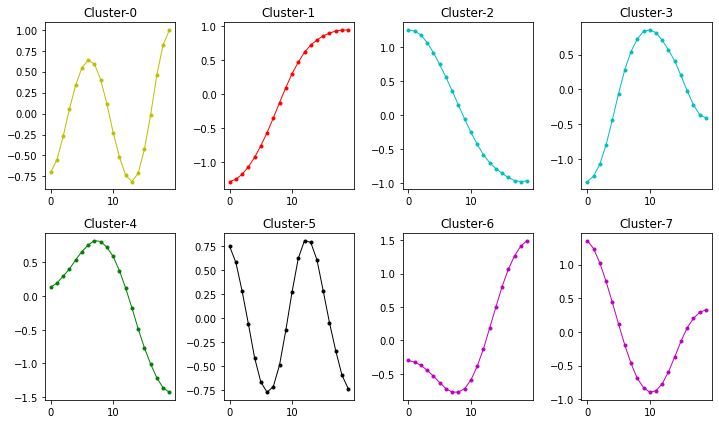

In [ ]:
# Centroid pattern을 그린다
fig = plt.figure(figsize=(10, 6))
colors = "bgrcmykw"
centXY = km.cluster_centers_
for i in range(K):
    s = 'pattern-' + str(i)
    p = fig.add_subplot(2, (K+1)//2, i+1)
    p.plot(centXY[i], 'b-o', markersize=3, color=colors[np.random.randint(0, 7)], linewidth=1.0)
    p.set_title('Cluster-' + str(i))

plt.tight_layout()
plt.show()

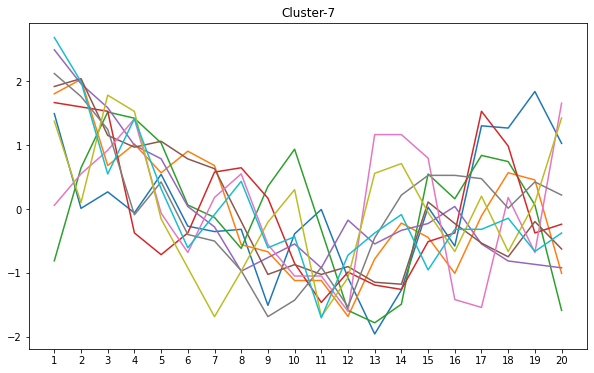

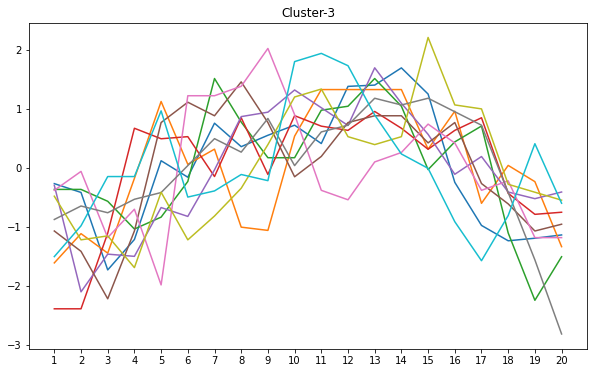

In [ ]:
cluster = 7
df['cluster'] = y_km
plt.figure(figsize=(10, 6))
p = df.loc[df['cluster'] == cluster]
p = p.sample(frac=1).reset_index(drop=True)
for i in range(10):
    plt.plot(p.iloc[i][0:20])
    
plt.title('Cluster-' + str(cluster))
plt.show()

cluster = 3
df['cluster'] = y_km
plt.figure(figsize=(10, 6))
p = df.loc[df['cluster'] == cluster]
p = p.sample(frac=1).reset_index(drop=True)
for i in range(10):
    plt.plot(p.iloc[i][0:20])
    
plt.title('Cluster-' + str(cluster))
plt.show()